<a href="https://colab.research.google.com/github/novemberrain123/movies-notebook/blob/master/final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Member:

Lim Hang Shen (19WMR12640)

Gan Yih Wee (19MWR11872)

Lim Jun Shen (19WMR12596)

# Business Understanding
Our client is a movie studio who wants us to:


*   Explore the data to discover current trends.
      *   Try to correlate genre and revenue and thus create a model that can predict revenue based on genre.
      *   Try to find optimal budget by correlating budget and revenue.
*   Create a movie recommendation system for users based on past movie data and customer reviews.
*   Predict review scores based on movie features.
*   Predict the revenue based on movie features.

Conflicts : 

*   Whether to focus on review score or revenue (Primary goal is increasing revenue but low review scores may lower potential revenue in the long run)





# Data Understanding


##Data collection

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


We're using the movies dataset from kaggle [here](https://www.kaggle.com/rounakbanik/the-movies-dataset?select=credits.csv). We tried to use the kaggle API to download the data but it seemed more hassle than worth for such a small dataset. So we just did it manually.


In [ ]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
movies=pd.read_csv("/content/drive/Shared drives/DS Assignment/movies_metadata.csv")
credits=pd.read_csv("/content/drive/Shared drives/DS Assignment/credits.csv")

We wanna merge these two dataframes. Let's look at their columns properties.

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


We will have to change id type to str for both of them.

In [ ]:
movies['id'] = movies['id'].astype('|S')
credits['id'] = credits['id'].astype('|S')

movies= movies.merge(credits,on='id')

In [ ]:
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,b'8844',tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,b'15602',tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,b'31357',tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,b'11862',tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."




* belongs_to_collection - The collection of the movie belongs to.
* budget - The budget in which the movie was made.
* genres - The genre of the movie, Action, Comedy ,Thriller etc.
* homepage - A link to the homepage of the movie.
* id - A unique identifier for each movie.
* imdb_id - The movie id in IMDB website.
* original_language - The language in which the movie was made.
* original_title - The title of the movie before translation or adaptation.
* overview - A brief description of the movie.
* popularity - A numeric quantity specifying the movie popularity.
* poster_path - Url path to get the movie poster.
* production_companies - The production house of the movie.
* production_countries - The country in which it was produced.
* release_date - The date on which it was released.
* revenue - The worldwide revenue generated by the movie.
* runtime - The running time of the movie in minutes.
* spoken_languages - Language spoken in the movie.
* status - "Released" or "Rumored".
* tagline - Movie's tagline.
* title - Title of the movie.
* vote_average - average ratings the movie recieved.
* vote_count - the count of votes recieved.
* cast - The casted actors/actresses in the movie
* crew - The crew as listed in the credits


In [ ]:
movies.tail()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
45533,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10751, 'n...",http://www.imdb.com/title/tt6209470/,b'439050',tt6209470,fa,رگ خواب,Rising and falling between a man and woman.,0.072051,/jldsYflnId4tTWPx8es3uzsB1I8.jpg,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",NaN,0.0,90.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,Rising and falling between a man and woman,Subdue,False,4.0,1.0,"[{'cast_id': 0, 'character': '', 'credit_id': ...","[{'credit_id': '5894a97d925141426c00818c', 'de..."
45534,False,NaN,0,"[{'id': 18, 'name': 'Drama'}]",NaN,b'111109',tt2028550,tl,Siglo ng Pagluluwal,An artist struggles to finish his work while a...,0.178241,/xZkmxsNmYXJbKVsTRLLx3pqGHx7.jpg,"[{'name': 'Sine Olivia', 'id': 19653}]","[{'iso_3166_1': 'PH', 'name': 'Philippines'}]",2011-11-17,0.0,360.0,"[{'iso_639_1': 'tl', 'name': ''}]",Released,NaN,Century of Birthing,False,9.0,3.0,"[{'cast_id': 1002, 'character': 'Sister Angela...","[{'credit_id': '52fe4af1c3a36847f81e9b15', 'de..."
45535,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,b'67758',tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",0.903007,/d5bX92nDsISNhu3ZT69uHwmfCGw.jpg,"[{'name': 'American World Pictures', 'id': 6165}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0,"[{'cast_id': 6, 'character': 'Emily Shaw', 'cr...","[{'credit_id': '52fe4776c3a368484e0c8387', 'de..."
45536,False,NaN,0,[],NaN,b'227506',tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",0.003503,/aorBPO7ak8e8iJKT5OcqYxU3jlK.jpg,"[{'name': 'Yermoliev', 'id': 88753}]","[{'iso_3166_1': 'RU', 'name': 'Russia'}]",1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0,"[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '533bccebc3a36844cf0011a7', 'de..."
45537,False,NaN,0,[],NaN,b'461257',tt6980792,en,Queerama,50 years after decriminalisation of homosexual...,0.163015,/s5UkZt6NTsrS7ZF0Rh8nzupRlIU.jpg,[],"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",2017-06-09,0.0,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Queerama,False,0.0,0.0,[],"[{'credit_id': '593e676c92514105b702e68e', 'de..."


In [ ]:
movies.shape

(45538, 26)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45538 non-null  object 
 1   belongs_to_collection  4500 non-null   object 
 2   budget                 45538 non-null  object 
 3   genres                 45538 non-null  object 
 4   homepage               7792 non-null   object 
 5   id                     45538 non-null  object 
 6   imdb_id                45521 non-null  object 
 7   original_language      45527 non-null  object 
 8   original_title         45538 non-null  object 
 9   overview               44584 non-null  object 
 10  popularity             45535 non-null  object 
 11  poster_path            45152 non-null  object 
 12  production_companies   45535 non-null  object 
 13  production_countries   45535 non-null  object 
 14  release_date           45451 non-null  object 
 15  re

## Exploratory data analysis

In [ ]:
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

In [ ]:
# statistics for numerical columns only
movies.describe(include=[np.number])

,revenue,runtime,vote_average,vote_count
count,4.553500e+04,45278.000000,45535.000000,45535.000000
mean,1.119860e+07,94.128517,5.618232,109.791128
std,6.428227e+07,38.396184,1.924203,490.920864
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [ ]:
# statistics for string/object type columns only
movies.describe(include=['O'])

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,video,cast,crew
count,45538,4500,45538,45538,7792,45538,45521,45527,45538,44584,45535,45152,45535,45535,45451,45535,45454,20439,45535,45535,45538,45538
unique,2,1695,1223,4066,7670,45432,45415,89,43370,44305,44174,45020,22707,2390,17333,1931,6,20283,42276,2,43019,44669
top,False,"{'id': 415931, 'name': 'The Bowery Boys', 'pos...",0,"[{'id': 18, 'name': 'Drama'}]",http://www.georgecarlin.com,b'141971',tt1180333,en,Blackout,No overview found.,0.0,/8VSZ9coCzxOCW2wE2Qene1H1fKO.jpg,[],"[{'iso_3166_1': 'US', 'name': 'United States o...",2008-01-01,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Which one is the first to return - memory or t...,Blackout,False,[],[]
freq,45529,29,36626,5008,12,9,9,32316,12,133,34,9,11896,17873,136,22425,45087,9,13,45442,2420,771


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5625d93d68>,
      dtype=object)

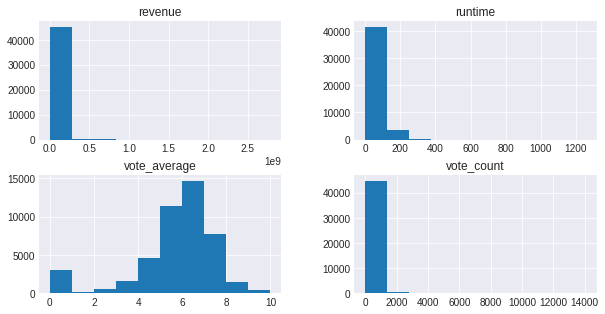

In [ ]:
# Plot histograms of column values for each numerical column
movies.select_dtypes(include=np.number).hist()

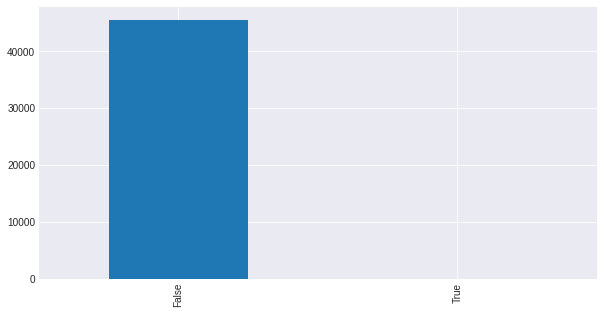

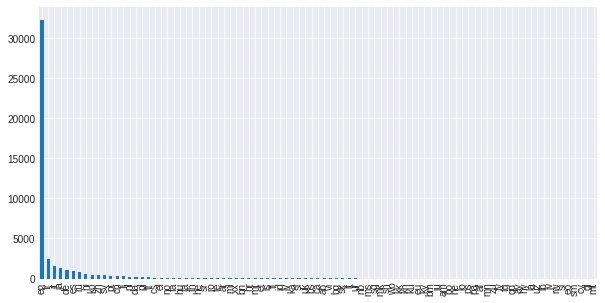

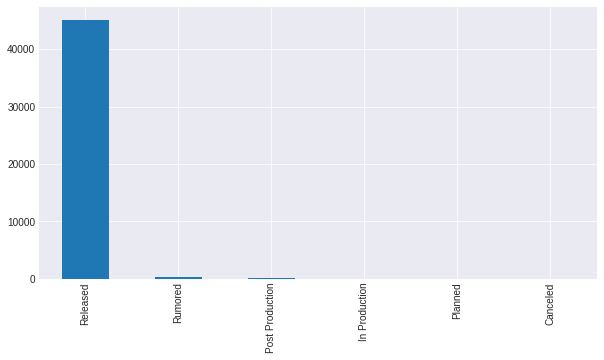

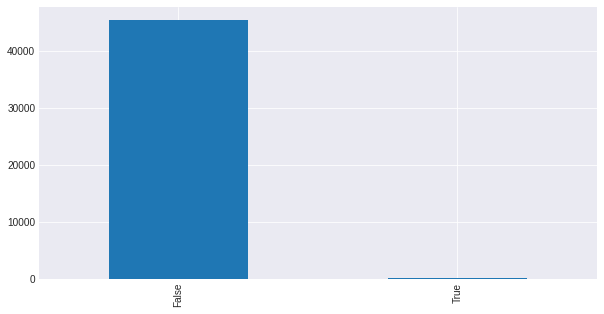

In [ ]:
# find the count of unique values in the index 

for object in ['adult','original_language','status','video']:
  plt.figure()
  movies[object].value_counts().plot.bar()
  plt.show()
  
 
  

In [ ]:
# Percentage of missing values in each column
movies.isna().mean()

adult                    0.000000
belongs_to_collection    0.901181
budget                   0.000000
genres                   0.000000
homepage                 0.828890
id                       0.000000
imdb_id                  0.000373
original_language        0.000242
original_title           0.000000
overview                 0.020950
popularity               0.000066
poster_path              0.008476
production_companies     0.000066
production_countries     0.000066
release_date             0.001910
revenue                  0.000066
runtime                  0.005710
spoken_languages         0.000066
status                   0.001845
tagline                  0.551166
title                    0.000066
video                    0.000066
vote_average             0.000066
vote_count               0.000066
cast                     0.000000
crew                     0.000000
dtype: float64

In [ ]:
# Percentage of missing values in each row
movies.isna().mean(axis=1).mean()

0.08928215488669108

In [ ]:
movies.loc[movies.title.isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew
19801,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,b'82663',tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'cast_id': 12, 'character': 'Sean Dillon', '...","[{'credit_id': '52fe48659251416c9108b001', 'de..."
29584,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,b'122662',tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'cast_id': 5, 'character': 'Rune Balot', 'cr...","[{'credit_id': '52fe4a7fc3a368484e156c65', 'de..."
35667,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,b'249260',tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'cast_id': 3, 'character': 'Wade', 'credit_i...","[{'credit_id': '52fe4f40c3a36847f82c8845', 'de..."


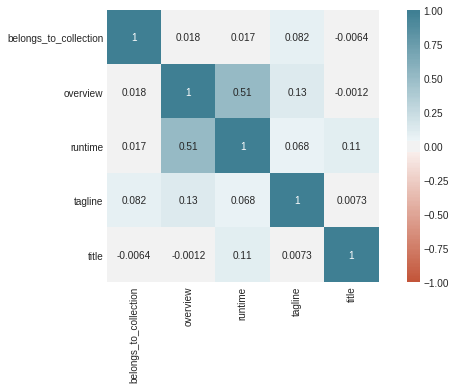

In [ ]:
# Plot correlation of missing values 
null_columns=movies[['belongs_to_collection','overview','runtime','tagline', 'title']]
sns.heatmap(null_columns.isnull().corr(), 
            vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True)

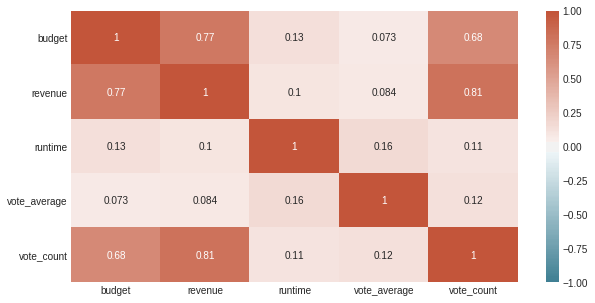

In [ ]:
# Plot correlation matrix for numerical features
movies['budget'] = movies['budget'].astype(float)

sns.heatmap(movies.select_dtypes(include=np.number).corr(), 
            vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(220, 20, n=200),annot=True)
#We'll take a closer look at columns that are closely related.

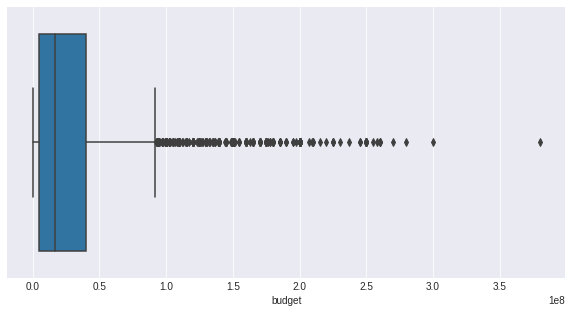

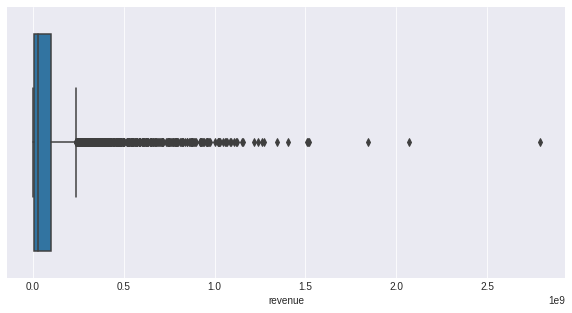

RMSE: 2.2924711898685624e+16
R2:0.1678201658987698
(5393, 26)


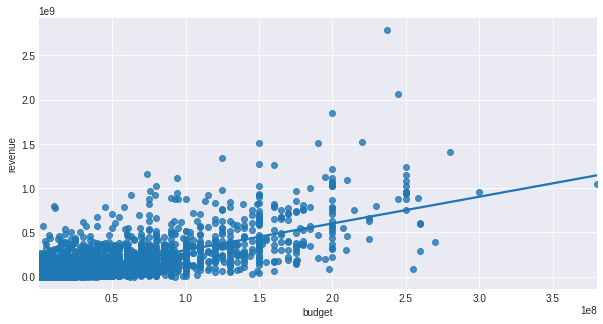

In [ ]:
#drop movies where revenue and budget information is not available as it is an important column for analysis
from sklearn.metrics import mean_squared_error, r2_score
import math
movies.reset_index()
movies1 = movies.drop(movies[(movies.budget == 0) | (movies.revenue == 0) | (movies.revenue.isnull())].index)
def bplotBandR(df,x,y):
  plt.figure()
  sns.boxplot(x=df[x])
  plt.show()
  plt.figure()
  sns.boxplot(x=df[y])
  plt.show()

bplotBandR(movies1,'budget','revenue')
sns.regplot(movies1['budget'],movies1['revenue'],ci=10)

def printScore(df,x,y):
  rmse = float(mean_squared_error(df[x],df[y],squared=True))
  r2 = r2_score(df[y],df[x])
  print("RMSE: "+str(rmse))
  print("R2:"+str(r2))
  print(df.shape)

printScore(movies1,'budget','revenue')

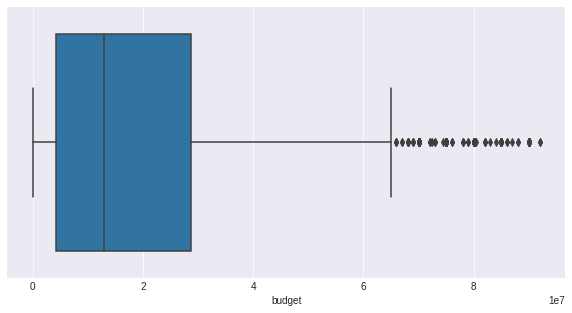

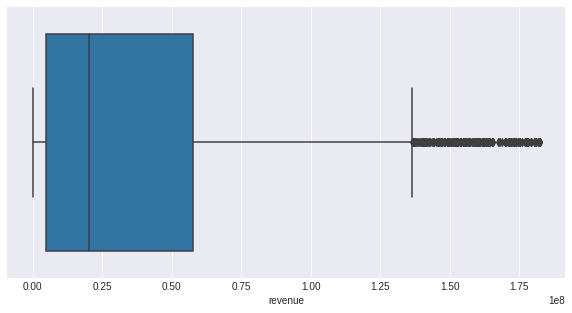

RMSE: 1741617189996987.0
R2:0.1159330222457512
(4578, 26)


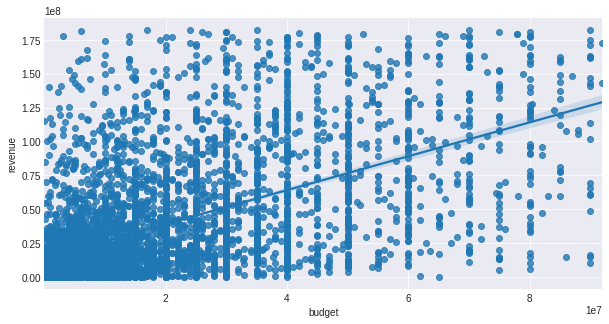

In [ ]:
#Remove outliers once
def removeOutliers(df,column):
  Q1 = df[column].quantile(0.25)
  Q3 = df[column].quantile(0.75)
  IQR = Q3 - Q1    #IQR is interquartile range. 

  filter = (df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 *IQR)
  return df[filter]


moviesR = removeOutliers(movies1,'budget')
moviesR = removeOutliers(moviesR,'revenue')

bplotBandR(moviesR,'budget','revenue')
sns.regplot(moviesR['budget'],moviesR['revenue'])
printScore(moviesR,'budget','revenue')

In [ ]:
import datetime as dt
movies['release_date']= pd.to_datetime(movies['release_date']) 
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45538 non-null  object        
 1   belongs_to_collection  4500 non-null   object        
 2   budget                 45538 non-null  float64       
 3   genres                 45538 non-null  object        
 4   homepage               7792 non-null   object        
 5   id                     45538 non-null  object        
 6   imdb_id                45521 non-null  object        
 7   original_language      45527 non-null  object        
 8   original_title         45538 non-null  object        
 9   overview               44584 non-null  object        
 10  popularity             45535 non-null  object        
 11  poster_path            45152 non-null  object        
 12  production_companies   45535 non-null  object        
 13  p

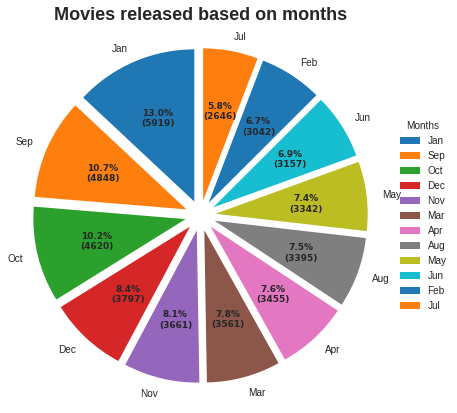

In [ ]:
#Pie chart for number of movies released based on month
import calendar as cl

explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(allvalues)) 
    return "{:.1f}%\n({:d})".format(pct, absolute) 

data_months = movies['release_date'].dt.month.value_counts()

def createPieChart(data):
  months = data.index
  months_name = []
  for m in months:
    m=int(m)
    months_name.append(cl.month_abbr[m])

  fig, ax = plt.subplots(figsize =(10, 7)) 
  wedges, texts, autotexts = ax.pie(data,  
                                    autopct = lambda pct: func(pct, data), 
                                    explode = explode,
                                    labels = months_name,  
                                    startangle = 90) 
    
  # Adding legend 
  ax.legend(wedges, months_name, 
            title ="Months", 
            loc ="center left", 
            bbox_to_anchor =(1, 0, 0.5, 1)) 
    
  plt.setp(autotexts, size = 9, weight ="bold",fontname="Times New Roman") 
  ax.set_title("Movies released based on months",fontweight="bold",fontsize=18) 
    
  # show plot 
  plt.show() 

createPieChart(data_months)


In [ ]:
months = data_months.index
len(movies.loc[movies.release_date.dt.month == 12])

3798

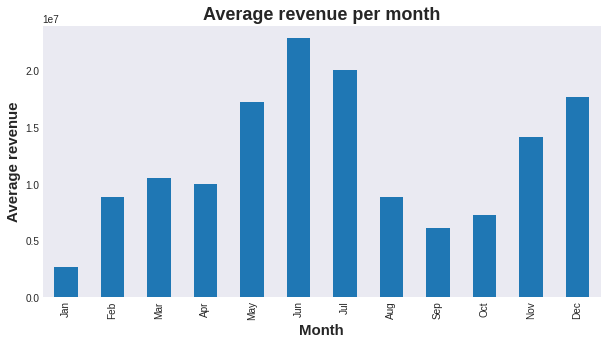

In [ ]:
#Bar chart for average revenue per month
movies['bins'] = movies['release_date'].dt.month
data_revenue = movies.groupby('bins')['revenue'].aggregate(np.mean)
plt.figure()
months_to_revenue = data_revenue.plot.bar()
months_to_revenue.set_ylabel('Average revenue',fontweight="bold",fontsize=15)
months_to_revenue.set_title('Average revenue per month',fontweight="bold",fontsize=18)
months_to_revenue.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
months_to_revenue.set_xlabel('Month',fontweight="bold",fontsize=15)
plt.grid()
plt.show()

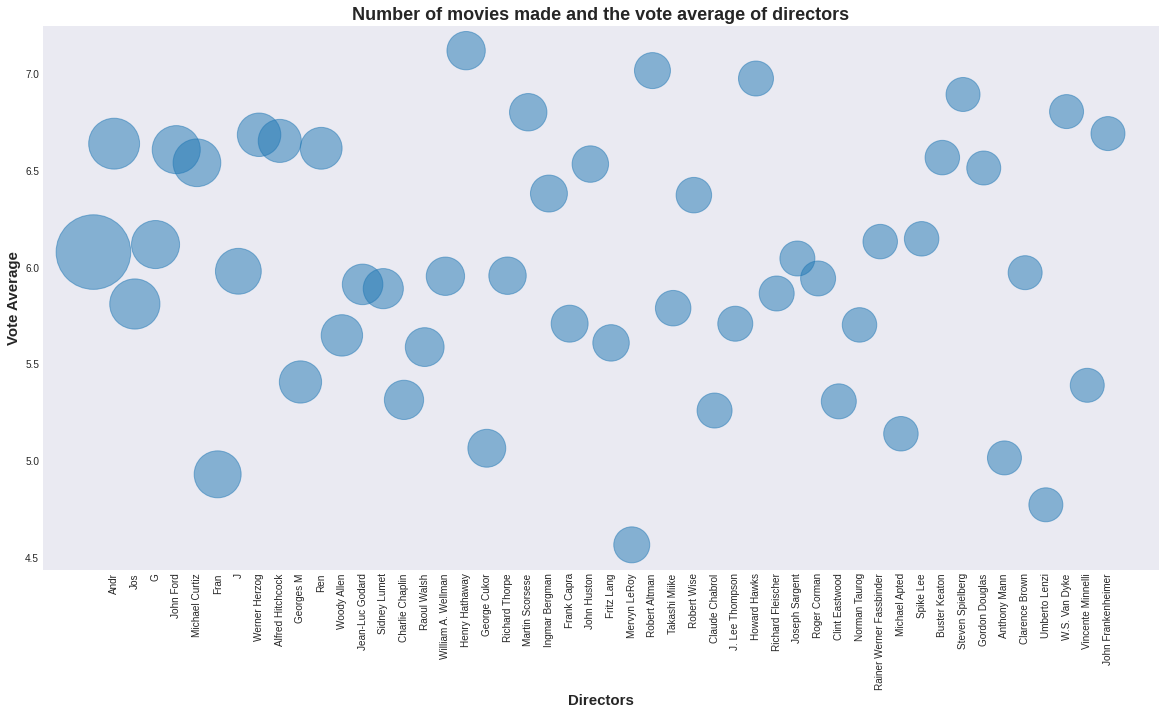

RMSE: 1905.5679747116042
R2:-3.8537927635896354


In [ ]:
#Bubble plot for number of movies made and the vote average of directors
import re
movies['director'] = movies['crew'].str.extract("'Director', 'name': '([A-Za-z \-\.]*)")
director = movies['director'].value_counts().index[:50].tolist()
directorTop50 = movies.loc[movies['director'].isin(director)]
voteAverage = directorTop50.groupby(['director'], as_index=True)['vote_average'].aggregate(np.mean)
numOfMovies = directorTop50['director'].value_counts()

plt.figure(figsize=(20,10))
plt.scatter(director, voteAverage, s=numOfMovies*35, alpha=0.5)
plt.title('Number of movies made and the vote average of directors',fontweight="bold",fontsize=18)
plt.xlabel('Directors',fontweight="bold",fontsize=15)
plt.ylabel('Vote Average',fontweight="bold",fontsize=15)
plt.xticks(rotation=90)
plt.grid()
plt.show()

rmse = float(mean_squared_error(voteAverage,numOfMovies,squared=True))
r2 = r2_score(numOfMovies,voteAverage)
print("RMSE: "+str(rmse))
print("R2:"+str(r2))

In [ ]:
#Removed unnecessary string in the genres columns
x = movies['genres'].str.extractall("'name': '([a-zA-Z]*)")
x = x.reset_index(level=[0,1])
x.columns = ['A', 'B', 'C']
x = x.groupby(['A'])['C'].apply(lambda x: ','.join(x.astype(str))).reset_index()
movies['genres'] = x['C']
movies.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,bins,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"Animation,Comedy,Family",http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
1,False,NaN,65000000.0,"Adventure,Fantasy,Family",NaN,b'8844',tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",12.0,Joe Johnston
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"Romance,Comedy",NaN,b'15602',tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",12.0,Howard Deutch
3,False,NaN,16000000.0,"Comedy,Drama,Romance",NaN,b'31357',tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.85949,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",12.0,Forest Whitaker
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,Comedy,NaN,b'11862',tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.38752,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",2.0,Charles Shyer


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45538 non-null  object        
 1   belongs_to_collection  4500 non-null   object        
 2   budget                 45538 non-null  float64       
 3   genres                 43096 non-null  object        
 4   homepage               7792 non-null   object        
 5   id                     45538 non-null  object        
 6   imdb_id                45521 non-null  object        
 7   original_language      45527 non-null  object        
 8   original_title         45538 non-null  object        
 9   overview               44584 non-null  object        
 10  popularity             45535 non-null  object        
 11  poster_path            45152 non-null  object        
 12  production_companies   45535 non-null  object        
 13  p

In [ ]:
#Slipt the multiple genres in a row into multiple rows 
movies.genres = movies.genres.str.split(',')
moviesplot=movies.explode('genres')
moviesplot.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,bins,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Animation,http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Comedy,http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Family,http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
1,False,NaN,65000000.0,Adventure,NaN,b'8844',tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",12.0,Joe Johnston
1,False,NaN,65000000.0,Fantasy,NaN,b'8844',tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",12.0,Joe Johnston


In [ ]:
moviesplot.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,bins,director
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Animation,http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Comedy,http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,Family,http://toystory.disney.com/toy-story,b'862',tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.9469,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
1,False,NaN,65000000.0,Adventure,NaN,b'8844',tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",12.0,Joe Johnston
1,False,NaN,65000000.0,Fantasy,NaN,b'8844',tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.0155,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",12.0,Joe Johnston


Standard deviation of average ratings over years for each genre
Drama: 0.07851104598565462
Comedy: 0.1093735600429454
Thriller: 0.19640068414954873
Action: 0.17099406314889679
Romance: 0.14627232002251123


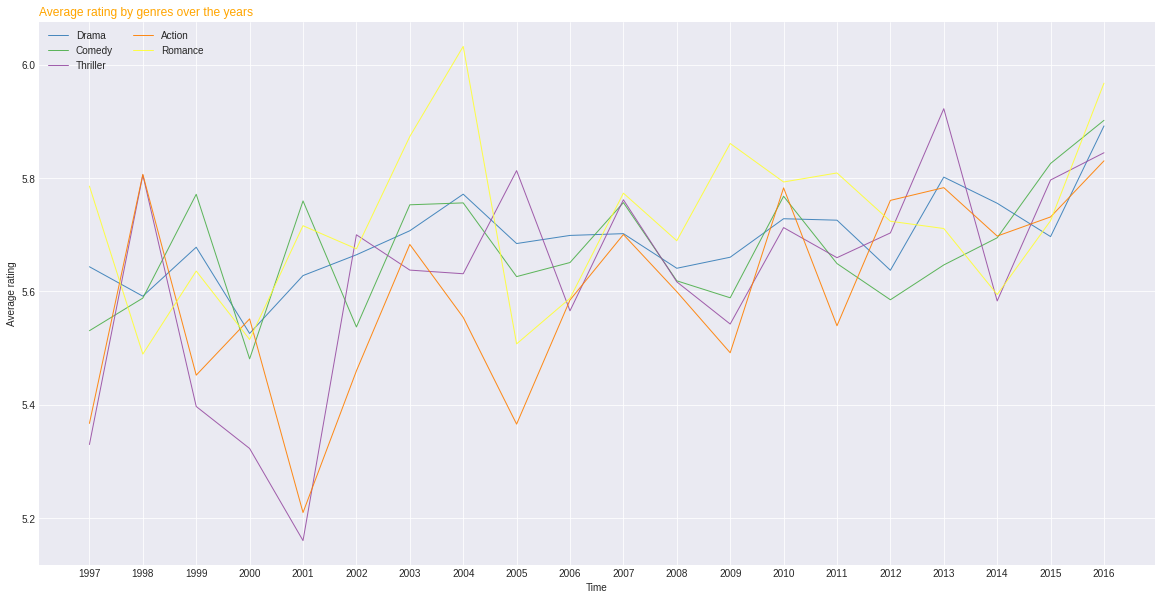

In [ ]:
# libraries and data
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

fig, ax = plt.subplots(figsize=(20, 10))
# style
plt.style.use('seaborn-darkgrid')
 
# create a color palette
palette = plt.get_cmap('Set1')
 
# multiple line plot

x =[]
for z in range (1997,2017):
  x.append(z)


moviesRecent20 = moviesplot.loc[moviesplot.release_date.dt.year.isin(x)]
moviesRecent20['bins'] = moviesRecent20['release_date'].dt.year
moviesRecent20 = moviesRecent20.drop(moviesRecent20[moviesRecent20.genres.isnull()].index)

num=0
g=moviesRecent20['genres'].value_counts().index.tolist()[:5]
print("Standard deviation of average ratings over years for each genre")
for column in g:
  num+=1

  plt.plot(x, moviesRecent20.loc[moviesRecent20.genres==column].groupby('bins')['vote_average'].aggregate(np.mean), marker='', color=palette(num), linewidth=1, alpha=0.9, label=column)
  print(column+": "+str((moviesRecent20.loc[moviesRecent20.genres==column].groupby('bins')['vote_average'].aggregate(np.mean)).aggregate(np.std)))
# Add legend
plt.legend(loc=2, ncol=2)
 
# Add titles
plt.title("Average rating by genres over the years", loc='left', fontsize=12, fontweight=0, color='orange')
plt.xlabel("Time")
plt.ylabel("Average rating")
plt.locator_params(axis='x', nbins=40)

x=list(map(str,x))
ax.set_xticks(range(1997,2017))



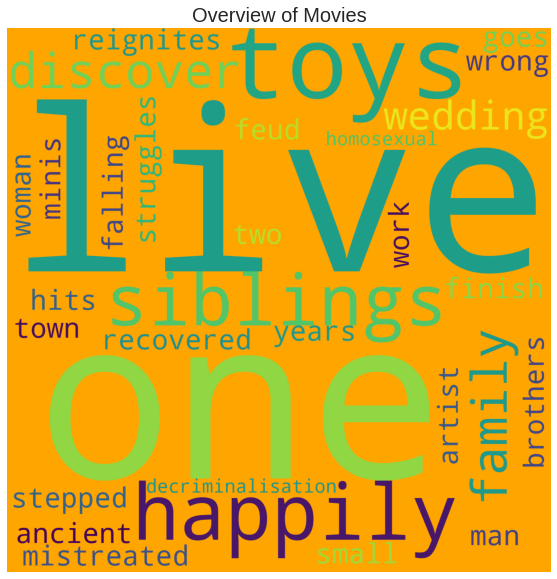

In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

plt.rcParams['figure.figsize'] = (10, 10)
plt.style.use('fast')

stopw = ["dtype","object","Length","series","overview","wom","version","encha","professiona"] + list(STOPWORDS)
wc = WordCloud(background_color = 'orange', width = 1500, height = 1500, stopwords=stopw, regexp=r"\b[a-z]{2,}\b").generate(str(movies['overview']))
plt.title('Overview of Movies', fontsize = 20)

plt.imshow(wc)
plt.axis('off')
plt.show()

###Data Understanding Summary

Movies
*   Consists of 45466 entries and 24 columns.
*   Over 90% of belongs_to_collection entries are missing values.
*   Over 50% of tagline entries are missing values.
*   Relevent cross-correlation (> 0.5) between overview and runtime in their values being null.
*   Significant cross-correlation (> 0.8) between revenue and vote_count.
*   Significant cross-correlation (> 0.7) between revenue and budget, after further analysis, initial regression reveals high RMSE and low R2 Score. R2 score lowers after pruning outliers. We hypothesize that this is due to high unpredictability of low budget movies that have even higher presence in data after outlier pruning.
*   More movies are released on the months towards the end of the year and January.
*   On average, higher revenue is made at the middle and the end of the year while June has the highest average revenue during a year.
*   After plotting the scatter graph, we find that there's no relationship between the vote average and the number of movies made by directors.
*  Top 5 genres of the recent 20 years of the data excluding 2017 (1997 to 2016) are drama, romance, comedy, thriller and action.
*  The average rating over the years of the drama genre is the most stable (lowest std) out of top 5 genres, while romance is the most volatile.
*  From the wordcloud of the movie overviews, the most common words are family, toys, discover, live, happily etc. This indicates that most movies have positive themes.


# Data Preparation

In [ ]:
movies.shape

(45538, 28)

In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45538 entries, 0 to 45537
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  45538 non-null  object        
 1   belongs_to_collection  4500 non-null   object        
 2   budget                 45538 non-null  float64       
 3   genres                 43096 non-null  object        
 4   homepage               7792 non-null   object        
 5   id                     45538 non-null  object        
 6   imdb_id                45521 non-null  object        
 7   original_language      45527 non-null  object        
 8   original_title         45538 non-null  object        
 9   overview               44584 non-null  object        
 10  popularity             45535 non-null  object        
 11  poster_path            45152 non-null  object        
 12  production_companies   45535 non-null  object        
 13  p

In [ ]:
#Fill NaN values in title column with values from original_title
movies['title']=movies["title"].fillna(movies["original_title"])

In [ ]:
#Drop meaningless columns

movies = movies.drop(["homepage","imdb_id","poster_path","original_title"],axis=1)

In [ ]:
#Unable to retrived any rows using the loc method normally, which means we have to encode the column.
# 0 = false , 1 = true and 2 =NaN
#Checkout the movies where video = 1 (true)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  
movies['video']=movies['video'].astype('|S')
movies['video']=le.fit_transform(movies['video'])
movies.loc[movies.video == 1]


,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count,cast,crew,bins,director
5512,False,NaN,0.0,"[Horror, Documentary]",b'15173',en,"Get ready as Bob the Tomato, Larry the Cucumbe...",1.73418,"[{'name': 'Big Idea Productions', 'id': 3204}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2002-10-04,0.0,82.0,"[{'iso_639_1': 'cs', 'name': 'Český'}, {'iso_6...",Released,Fresh Fish. Mixed Vegetables.,Jonah: A VeggieTales Movie,1,6.4,22.0,"[{'cast_id': 1, 'character': 'Archibald Aspara...","[{'credit_id': '52fe46419251416c750725c1', 'de...",10.0,Phil Vischer
11514,False,"{'id': 123438, 'name': 'Loose Change Collectio...",5000.0,"[Crime, Drama, Mystery, Thriller]",b'14277',en,What if...September 11th was not a surprise at...,0.651714,"[{'name': 'Polar Film Medien GmbH', 'id': 52...","[{'iso_3166_1': 'US', 'name': 'United States o...",2006-06-01,0.0,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What really happened on 9/11?,Loose Change: 2nd Edition,1,6.3,16.0,[],"[{'credit_id': '52fe45e19251416c75065955', 'de...",6.0,Dylan Avery
13618,False,NaN,0.0,"[Drama, Comedy, Romance]",b'284117',en,A short film in which Quran verses are shown a...,0.040068,[],"[{'iso_3166_1': 'NL', 'name': 'Netherlands'}]",2008-03-27,0.0,15.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Fitna,1,1.0,1.0,[],"[{'credit_id': '53d68625c3a3686b85006048', 'de...",3.0,Scarlet Pimpernel
14337,False,"{'id': 190135, 'name': 'Love Hina Collection',...",0.0,[Drama],b'44685',ja,"The tests have come, and Keitaro can only hope...",1.78571,"[{'name': 'TV Tokyo', 'id': 3034}, {'name': 'X...","[{'iso_3166_1': 'JP', 'name': 'Japan'}]",2001-03-31,0.0,48.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,Spring break... Love Hina Style!!,Love Hina Spring Special - I Wish Your Dream,1,4.7,3.0,"[{'cast_id': 3, 'character': 'Naru Narusegawa'...","[{'credit_id': '52fe4697c3a36847f8107357', 'de...",3.0,Yoshiaki Iwasaki
14674,False,NaN,0.0,"[Adventure, Drama, History]",b'35148',en,"Ahoy, matey! Your Favorite Playmobil toys have...",0.014168,[],[],2009-10-13,0.0,140.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,NaN,Playmobil: The Secret of Pirate Island,1,0.0,0.0,"[{'cast_id': 3, 'character': 'Poppy / Pegger /...","[{'credit_id': '52fe45979251416c91037a47', 'de...",10.0,Alexander E. Sokoloff
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44361,False,NaN,0.0,NaN,b'161337',en,Underworld: Endless War is a collection of thr...,3.301063,[],[],2011-10-19,0.0,18.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Underworld: Endless War,1,5.6,38.0,"[{'cast_id': 5, 'character': 'Kraven / Lord Cl...","[{'credit_id': '563dc09a9251413442001e97', 'de...",10.0,Juno John Lee
44873,False,NaN,0.0,NaN,b'425916',en,"The adventures of Salad Fingers, an unspecifie...",0.141367,[],"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",NaT,0.0,52.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Salad Fingers,1,8.5,4.0,"[{'cast_id': 1, 'character': 'Everyone', 'cred...","[{'credit_id': '5998998792514125b5015394', 'de...",NaN,NaN
44934,False,NaN,0.0,NaN,b'334795',ru,Four music videos of Kino band joined together...,0.0,[],[],1986-01-01,0.0,23.0,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,Victor Tsoy's movie debut,The End of a Vacation,1,0.0,0.0,"[{'cast_id': 0, 'character': '', 'credit_id': ...",[],1.0,NaN
45054,False,NaN,0.0,NaN,b'461088',fa,When the corrupted groom starts shooting in th...,0.034119,[],"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",2016-03-22,0.0,89.0,"[{'iso_639_1': 'fa', 'name': 'فارسی'}]",Released,NaN,50 Kilos of Sour Cherry,1,0.0,0.0,"[{'cast_id': 12, 'character': 'Aida Soufi', 'c...","[{'credit_id': '5939c9779251411eed0016c3', 'de...",3.0,Mani Haghighi


In [ ]:
#After looking at few movies where 'video' = 1 (true) , we believe that it means it only released at video.
#If the value is higher, the column might have some significants statistical. But the number is too low to justify having the column, so we feel that we can remove it 

In [ ]:
movies= movies.drop('video',axis=1)

In [ ]:
#Checkout and count the value of status column
movies['status'].value_counts()

Released           45087
Rumored              232
Post Production       98
In Production         20
Planned               15
Canceled               2
Name: status, dtype: int64

In [ ]:
#Drop the non-released movie, then we have only value in the column lead to meaningless column (one value column)
movies = movies.drop(movies[movies.status != "Released"].index)

In [ ]:
#Since it is the one value column (released), after we dropped all the non released rows.
movies= movies.drop('status',axis=1)

In [ ]:
#Checkout the movies where adult column = true
print(str(len(movies.loc[movies.adult =='True']))+ " rows")
movies.loc[movies.adult =='True']

8 rows


,adult,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,bins,director
19561,True,NaN,0.0,"[Adventure, Drama, Action, History, War]",b'5422',it,A sailor takes an American businessman and his...,1.4201,"[{'name': 'Stefano Film', 'id': 6117}]","[{'iso_3166_1': 'IT', 'name': 'Italy'}]",1980-11-18,0.0,112.0,"[{'iso_639_1': 'it', 'name': 'Italiano'}]",NaN,Erotic Nights of the Living Dead,2.2,7.0,"[{'cast_id': 1, 'character': 'Luna', 'credit_i...","[{'credit_id': '582dee71925141095a00acc9', 'de...",11.0,NaN
28785,True,NaN,0.0,"[Drama, Western]",b'169158',en,The FBI and Texas police make ready to storm t...,1.34974,"[{'name': 'Trimark Pictures', 'id': 4063}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1998-01-11,0.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Trust Will Get You Killed,Standoff,4.8,5.0,"[{'cast_id': 1, 'character': 'Agent Jamie Dool...","[{'credit_id': '52fe4cdcc3a36847f824204b', 'de...",1.0,Andrew Chapman
32014,True,NaN,0.0,"[Crime, Drama, Action, Thriller, Mystery]",b'44781',cn,Electrical Girl centers around a horny young w...,0.001803,[],"[{'iso_3166_1': 'HK', 'name': 'Hong Kong'}]",2001-04-26,0.0,89.0,"[{'iso_639_1': 'cn', 'name': '广州话 / 廣州話'}]",NaN,Electrical Girl,0.0,0.0,"[{'cast_id': 3, 'character': 'Jan Fong', 'cred...","[{'credit_id': '52fe469bc3a36847f810843f', 'de...",4.0,Bowie Lau
32193,True,NaN,0.0,"[Comedy, Drama]",b'324230',es,Ágata suffers from a psychological disorder wh...,6.88983,"[{'name': 'KeyAtomics', 'id': 46055}]","[{'iso_3166_1': 'ES', 'name': 'Spain'}]",2014-02-14,0.0,72.0,"[{'iso_639_1': 'es', 'name': 'Español'}]","Comedy, food, drama and sex, a lot of sex",Diet of Sex,4.0,12.0,"[{'cast_id': 0, 'character': 'Hardik', 'credit...","[{'credit_id': '54d6658e9251415f750024e7', 'de...",2.0,Borja Brun
39979,True,NaN,0.0,"[Comedy, Drama, Romance]",b'35731',en,Shane Ryan's sequel to the disturbing Amateur ...,0.587751,"[{'name': 'Alter Ego Cinema', 'id': 5639}]","[{'iso_3166_1': 'US', 'name': 'United States o...",2008-05-13,0.0,0.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Humiliation. Rape. Murder. You know the drill.,Amateur Porn Star Killer 2,6.3,8.0,[],[],5.0,NaN
39980,True,NaN,0.0,"[Romance, Comedy]",b'55774',en,Australian film about a fictional sub-par Aust...,0.417214,[],"[{'iso_3166_1': 'AU', 'name': 'Australia'}]",2009-11-17,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]","Sex, drugs and Rock 'n Roll",The Band,3.3,7.0,"[{'cast_id': 1002, 'character': 'Candy Morgan'...","[{'credit_id': '52fe48dfc3a36847f817dfdd', 'de...",11.0,Anna Brownfield
40650,True,NaN,0.0,"[Romance, War, Comedy, Drama]",b'39922',da,Olaf and his mother run a boarding house and a...,1.182635,"[{'name': 'Scandica Film', 'id': 48812}]","[{'iso_3166_1': 'DK', 'name': 'Denmark'}, {'is...",1973-12-20,0.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Mother of all Dwarfsploitation films!,The Sinful Dwarf,5.8,13.0,"[{'cast_id': 1002, 'character': 'Mary, Wife', ...","[{'credit_id': '52fe473e9251416c9106ede5', 'de...",12.0,Vidal Raski
41085,True,NaN,750000.0,"[Horror, Drama]",b'376004',en,A man who returns home to find his wife cheati...,1.13377,[],[],2016-01-05,0.0,80.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Love. Betrayal. Vengeance,Adulterers,5.2,16.0,"[{'cast_id': 1, 'character': 'Samuel Deuprey',...","[{'credit_id': '568b1f8ac3a368607502ca87', 'de...",1.0,H.M. Coakley


In [ ]:

movies = movies.drop('adult',axis =1)

Drop duplicate rows

In [ ]:
#Drop duplicate rows

movies =movies.loc[movies.astype(str).drop_duplicates().index]

In [ ]:
movies.shape

(45083, 21)

In [ ]:
def findNullValues(df):
  null_columns=df.columns[df.isnull().any()]
  print(df[null_columns].isnull().sum())

findNullValues(movies)

belongs_to_collection    40608
genres                    2385
original_language           10
overview                   920
release_date                78
runtime                    251
tagline                  24759
bins                        78
director                  1028
dtype: int64


In [ ]:
movies.describe()

,budget,revenue,runtime,vote_average,vote_count,bins
count,4.508300e+04,4.508300e+04,44832.000000,45083.000000,45083.000000,45005.000000
mean,4.264387e+06,1.130937e+07,94.268424,5.623619,110.792228,6.463171
std,1.749619e+07,6.459396e+07,38.347310,1.915850,493.265340,3.626145
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,0.000000e+00,0.000000e+00,85.000000,5.000000,3.000000,3.000000
50%,0.000000e+00,0.000000e+00,95.000000,6.000000,10.000000,7.000000
75%,0.000000e+00,0.000000e+00,107.000000,6.800000,35.000000,10.000000
max,3.800000e+08,2.787965e+09,1256.000000,10.000000,14075.000000,12.000000


In [ ]:
#Drop all rows where vote_count is <=5, since lower vote_count rows can contribute to noise, ~25% of rows will be trimmed.
movies = movies.drop(movies[movies.vote_count <= 3].index)
movies.shape

(33187, 21)

In [ ]:
findNullValues(movies)

belongs_to_collection    29015
genres                    1496
original_language            2
overview                   366
release_date                 4
runtime                     43
tagline                  16033
bins                         4
director                   329
dtype: int64


In [ ]:
movies = movies.drop(movies[(movies.runtime.isnull()) | (movies.overview.isnull())].index)

In [ ]:
movies = movies.drop(movies[(movies.genres.isnull()) | (movies.genres == '[]')].index)

In [ ]:
movies = movies.drop(movies[(movies.spoken_languages.isnull()) | (movies.spoken_languages == '[]')].index)
movies = movies.reset_index(drop=True)

In [ ]:
findNullValues(movies)

belongs_to_collection    26375
original_language            2
release_date                 2
tagline                  13904
bins                         2
director                   238
dtype: int64


In [ ]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30314 entries, 0 to 30313
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  3939 non-null   object        
 1   budget                 30314 non-null  float64       
 2   genres                 30314 non-null  object        
 3   id                     30314 non-null  object        
 4   original_language      30312 non-null  object        
 5   overview               30314 non-null  object        
 6   popularity             30314 non-null  object        
 7   production_companies   30314 non-null  object        
 8   production_countries   30314 non-null  object        
 9   release_date           30312 non-null  datetime64[ns]
 10  revenue                30314 non-null  float64       
 11  runtime                30314 non-null  float64       
 12  spoken_languages       30314 non-null  object        
 13  t

In [ ]:
movies.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,tagline,title,vote_average,vote_count,cast,crew,bins,director
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[Animation, Comedy, Family]",b'862',en,"Led by Woody, Andy's toys live happily in his ...",21.9469,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Toy Story,7.7,5415.0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",10.0,John Lasseter
1,NaN,65000000.0,"[Adventure, Fantasy, Family]",b'8844',en,When siblings Judy and Peter discover an encha...,17.0155,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",12.0,Joe Johnston
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[Romance, Comedy]",b'15602',en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",12.0,Howard Deutch
3,NaN,16000000.0,"[Comedy, Drama, Romance]",b'31357',en,"Cheated on, mistreated and stepped on, the wom...",3.85949,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",12.0,Forest Whitaker
4,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,[Comedy],b'11862',en,Just when George Banks has recovered from his ...,8.38752,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",2.0,Charles Shyer


In [ ]:
movies.iloc[0]['crew']

'[{\'credit_id\': \'52fe4284c3a36847f8024f49\', \'department\': \'Directing\', \'gender\': 2, \'id\': 7879, \'job\': \'Director\', \'name\': \'John Lasseter\', \'profile_path\': \'/7EdqiNbr4FRjIhKHyPPdFfEEEFG.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f4f\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12891, \'job\': \'Screenplay\', \'name\': \'Joss Whedon\', \'profile_path\': \'/dTiVsuaTVTeGmvkhcyJvKp2A5kr.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f55\', \'department\': \'Writing\', \'gender\': 2, \'id\': 7, \'job\': \'Screenplay\', \'name\': \'Andrew Stanton\', \'profile_path\': \'/pvQWsu0qc8JFQhMVJkTHuexUAa1.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f5b\', \'department\': \'Writing\', \'gender\': 2, \'id\': 12892, \'job\': \'Screenplay\', \'name\': \'Joel Cohen\', \'profile_path\': \'/dAubAiZcvKFbboWlj7oXOkZnTSu.jpg\'}, {\'credit_id\': \'52fe4284c3a36847f8024f61\', \'department\': \'Writing\', \'gender\': 0, \'id\': 12893, \'job\': \'Screenplay\', \'name\': \'A

In [ ]:
#Removed unnecessary string in the crew columns
x = movies['crew'].str.extractall("'name': '([a-zA-Z \-]*)")
x = x.reset_index(level=[0,1])
x.columns = ['A', 'B', 'C']
x = x.groupby(['A'])['C'].apply(lambda x: ','.join(x.astype(str))).reset_index()
movies['crew'] = x['C']
movies.head()


,A,C
0,0,"John Lasseter,Joss Whedon,Andrew Stanton,Joel ..."
1,1,"Larry J,Jonathan Hensleigh,James Horner,Joe Jo..."
2,2,"Howard Deutch,Mark Steven Johnson,Mark Steven ..."
3,3,"Forest Whitaker,Ronald Bass,Ronald Bass,Ezra S..."
4,4,"Alan Silvestri,Elliot Davis,Nancy Meyers,Nancy..."
...,...,...
30218,30309,"David M,David M,Robert Gunter,David Bixler,Har..."
30219,30310,"Asif Kapadia,Christopher Hampton,Kurban Said,D..."
30220,30311,"Greg Kiefer,Elizabeth Hansen,Greg Kiefer,Greg ..."
30221,30312,"Fiona Gordon,Dominique Abel,Dominique Abel,Fio..."


In [ ]:
x.iloc([0])

In [ ]:
#construct df for non text analytics modeling
movies_no_text = movies[['title','budget','genres','spoken_languages','popularity','revenue','runtime','vote_average','vote_count']]
movies_no_text['year']=  movies['release_date'].dt.year
movies_no_text = movies_no_text.drop(movies_no_text[(movies_no_text.revenue==0) | (movies_no_text.budget==0) | (movies_no_text.runtime == 0)].index)
movies_no_text.head()

,title,budget,genres,spoken_languages,popularity,revenue,runtime,vote_average,vote_count,year
0,Toy Story,30000000.0,"[Animation, Comedy, Family]","[{'iso_639_1': 'en', 'name': 'English'}]",21.9469,373554033.0,81.0,7.7,5415.0,1995.0
1,Jumanji,65000000.0,"[Adventure, Fantasy, Family]","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",17.0155,262797249.0,104.0,6.9,2413.0,1995.0
3,Waiting to Exhale,16000000.0,"[Comedy, Drama, Romance]","[{'iso_639_1': 'en', 'name': 'English'}]",3.85949,81452156.0,127.0,6.1,34.0,1995.0
5,Heat,60000000.0,"[Action, Crime, Drama, Thriller]","[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",17.9249,187436818.0,170.0,7.7,1886.0,1995.0
8,Sudden Death,35000000.0,"[Action, Adventure, Thriller]","[{'iso_639_1': 'en', 'name': 'English'}]",5.23158,64350171.0,106.0,5.5,174.0,1995.0


In [ ]:
movies_no_text=movies_no_text.explode('genres')
movies_no_text.head()

,title,budget,genres,spoken_languages,popularity,revenue,runtime,vote_average,vote_count,year
0,Toy Story,30000000.0,Animation,"[{'iso_639_1': 'en', 'name': 'English'}]",21.9469,373554033.0,81.0,7.7,5415.0,1995.0
0,Toy Story,30000000.0,Comedy,"[{'iso_639_1': 'en', 'name': 'English'}]",21.9469,373554033.0,81.0,7.7,5415.0,1995.0
0,Toy Story,30000000.0,Family,"[{'iso_639_1': 'en', 'name': 'English'}]",21.9469,373554033.0,81.0,7.7,5415.0,1995.0
1,Jumanji,65000000.0,Adventure,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",17.0155,262797249.0,104.0,6.9,2413.0,1995.0
1,Jumanji,65000000.0,Fantasy,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",17.0155,262797249.0,104.0,6.9,2413.0,1995.0


In [ ]:
x= movies['spoken_languages'].str.extractall("iso_[0-9]{3,}_[0-9]': '([a-zA-Z]{2,})")
x = x.reset_index(level=[0,1])
x

,level_0,match,0
0,0,0,en
1,1,0,en
2,1,1,fr
3,2,0,en
4,3,0,en
...,...,...,...
40190,30309,1,fr
40191,30310,0,en
40192,30311,0,en
40193,30312,0,fr


In [ ]:
x.columns = ['A', 'B', 'C']
print(x['C'].value_counts())
x = x.groupby(['A'])['C'].apply(lambda x: ','.join(x.astype(str))).reset_index()
x.shape

en    22077
fr     3302
de     2026
es     1838
it     1638
      ...  
ff        1
ht        1
ty        1
ab        1
uz        1
Name: C, Length: 123, dtype: int64


(30314, 2)

In [ ]:
movies_no_text['spoken_languages'] = x['C']
movies_no_text.head()

,title,budget,genres,spoken_languages,popularity,revenue,runtime,vote_average,vote_count,year
0,Toy Story,30000000.0,Animation,en,21.9469,373554033.0,81.0,7.7,5415.0,1995.0
0,Toy Story,30000000.0,Comedy,en,21.9469,373554033.0,81.0,7.7,5415.0,1995.0
0,Toy Story,30000000.0,Family,en,21.9469,373554033.0,81.0,7.7,5415.0,1995.0
1,Jumanji,65000000.0,Adventure,"en,fr",17.0155,262797249.0,104.0,6.9,2413.0,1995.0
1,Jumanji,65000000.0,Fantasy,"en,fr",17.0155,262797249.0,104.0,6.9,2413.0,1995.0


In [ ]:
movies_no_text.spoken_languages = movies_no_text.spoken_languages.str.split(',')
movies_no_text=movies_no_text.explode('spoken_languages')
movies_no_text.head()


,title,budget,genres,spoken_languages,popularity,revenue,runtime,vote_average,vote_count,year
0,Toy Story,30000000.0,Animation,en,21.9469,373554033.0,81.0,7.7,5415.0,1995.0
0,Toy Story,30000000.0,Comedy,en,21.9469,373554033.0,81.0,7.7,5415.0,1995.0
0,Toy Story,30000000.0,Family,en,21.9469,373554033.0,81.0,7.7,5415.0,1995.0
1,Jumanji,65000000.0,Adventure,en,17.0155,262797249.0,104.0,6.9,2413.0,1995.0
1,Jumanji,65000000.0,Adventure,fr,17.0155,262797249.0,104.0,6.9,2413.0,1995.0


In [ ]:
movies_no_text['genres'].value_counts()

Drama          4027
Comedy         2587
Thriller       1580
Romance        1492
Action         1355
Crime           936
Adventure       784
Horror          777
Science         618
Family          547
Documentary     509
Fantasy         468
Mystery         463
Music           328
History         308
War             282
Animation       268
Foreign         232
Western         188
TV               75
Name: genres, dtype: int64

In [ ]:
movies_no_text['spoken_languages'].value_counts()


en    10989
fr     1127
es      966
de      683
it      534
      ...  
ty        2
jv        2
kw        2
sa        2
br        1
Name: spoken_languages, Length: 91, dtype: int64

In [ ]:
movies_no_text['genres']=movies_no_text['genres'].astype('|S')
movies_no_text['genres']=le.fit_transform(movies_no_text['genres'])
movies_no_text.head(20)

,title,budget,genres,spoken_languages,popularity,revenue,runtime,vote_average,vote_count,year
0,Toy Story,30000000.0,2,en,21.9469,373554033.0,81.0,7.7,5415.0,1995.0
0,Toy Story,30000000.0,3,en,21.9469,373554033.0,81.0,7.7,5415.0,1995.0
0,Toy Story,30000000.0,7,en,21.9469,373554033.0,81.0,7.7,5415.0,1995.0
1,Jumanji,65000000.0,1,en,17.0155,262797249.0,104.0,6.9,2413.0,1995.0
1,Jumanji,65000000.0,1,fr,17.0155,262797249.0,104.0,6.9,2413.0,1995.0
1,Jumanji,65000000.0,8,en,17.0155,262797249.0,104.0,6.9,2413.0,1995.0
1,Jumanji,65000000.0,8,fr,17.0155,262797249.0,104.0,6.9,2413.0,1995.0
1,Jumanji,65000000.0,7,en,17.0155,262797249.0,104.0,6.9,2413.0,1995.0
1,Jumanji,65000000.0,7,fr,17.0155,262797249.0,104.0,6.9,2413.0,1995.0
3,Waiting to Exhale,16000000.0,3,en,3.85949,81452156.0,127.0,6.1,34.0,1995.0


In [ ]:
movies_no_text['spoken_languages'].unique()

array(['en', 'fr', 'es', 'ru', 'la', 'nl', 'cn', 'hu', 'da', 'de', 'gd',
       'ro', 'it', 'ja', 'kw', 'nv', 'ko', 'zh', 'no', 'sv', 'ar', 'cs',
       'mi', 'pl', 'he', 'ms', 'th', 'pt', 'sw', 'yi', 'vi', 'ne', 'tr',
       'km', 'fi', 'eo', 'el', 'hi', 'bg', 'bo', 'sq', 'fa', 'ty', 'cy',
       'af', 'xx', 'si', 'gn', 'hr', 'eu', 'mt', 'ur', 'ca', 'sk', 'sh',
       'so', 'uk', 'iu', 'is', 'zu', 'ga', 'pa', 'to', 'ce', 'sr', 'hy',
       'ml', 'ta', 'gl', 'bn', 'tl', 'xh', 'kk', 'ln', 'ps', 'my', 'bm',
       'mn', 'sa', 'et', 'te', 'ny', 'st', 'gu', 'mr', 'bs', 'id', 'ka',
       'br', 'jv', 'kn'], dtype=object)

In [ ]:
movies_no_text['spoken_languages']=movies_no_text['spoken_languages'].astype('|S')
movies_no_text['spoken_languages']=le.fit_transform(movies_no_text['spoken_languages'])
movies_no_text.head()

,title,budget,genres,spoken_languages,popularity,revenue,runtime,vote_average,vote_count,year
0,Toy Story,30000000.0,2,16,21.9469,373554033.0,81.0,7.7,5415.0,1995.0
0,Toy Story,30000000.0,3,16,21.9469,373554033.0,81.0,7.7,5415.0,1995.0
0,Toy Story,30000000.0,7,16,21.9469,373554033.0,81.0,7.7,5415.0,1995.0
1,Jumanji,65000000.0,1,16,17.0155,262797249.0,104.0,6.9,2413.0,1995.0
1,Jumanji,65000000.0,1,23,17.0155,262797249.0,104.0,6.9,2413.0,1995.0


In [ ]:
movies_no_text['popularity'] = movies_no_text['popularity'].astype(float)

In [ ]:
movies_no_text.shape

(17824, 10)

In [ ]:
findNullValues(movies_no_text)

Series([], dtype: float64)


In [ ]:
movies_no_text.index.value_counts()

6277     30
1626     30
2839     30
8557     28
4400     28
         ..
19637     1
6919      1
19229     1
17196     1
2047      1
Length: 5213, dtype: int64

# Data Preparation Summary
*   Filled null values in title with value in original title.
*   Dropped meaningless columns.
*   Dropped duplicate rows.
*   Dropped ~25% of rows where vote_count is <= 3.
*   Dropped rows where runtime, genres,  spoken_languages, overview are null or [].
*   Created a view of the main dataframe which only consists of columns which are either numeric or can be easily encoded.
*   Added year row derived from release_date.
*  Exploded the dataframe by the genres and spoken_languages columns.
*  Deleted rows where budget or revenue is == 0.

#Modelling

## Predicting the revenue using the runtime, budget and popularity

In [ ]:
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_squared_log_error
from pandas.plotting import scatter_matrix
from warnings import filterwarnings as fw
fw('ignore')
%matplotlib inline
import os

In [ ]:
movies_model=movies_no_text[['runtime','budget','popularity','revenue']].copy()
movies_model.head()

,runtime,budget,popularity,revenue
0,81.0,30000000.0,21.946943,373554033.0
0,81.0,30000000.0,21.946943,373554033.0
0,81.0,30000000.0,21.946943,373554033.0
1,104.0,65000000.0,17.015539,262797249.0
1,104.0,65000000.0,17.015539,262797249.0


In [ ]:
#splitting the data into training and validation to check validity of the model
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
x = movies_model.columns
movies_model = pd.DataFrame(scaler.fit_transform(movies_model), columns = x)

x = movies_model[['runtime', 'budget','popularity']]
y = movies_model.revenue
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)

In [ ]:
#Linear Model
from sklearn.linear_model import LinearRegression, Ridge, Lasso 
reg = LinearRegression()
lin_model = reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)
print('RMSE score for linear model is {}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

RMSE score for linear model is 0.039110758770093186


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
params = {'n_neighbors':[2,3,4,5,6]}
knn = KNeighborsRegressor()
clf = GridSearchCV(knn, params)
knn_model = clf.fit(x_train, y_train)

In [ ]:
knn_y_pred = clf.predict(x_test)
print('RMSE score for k-NN model is {}'.format(np.sqrt(mean_squared_error(y_test, knn_y_pred))))

RMSE score for k-NN model is 0.02107456004032579


In [ ]:
from sklearn.ensemble import RandomForestRegressor
params = {'max_depth':range(2,5),'n_estimators':(5,10,50,100,500)}
rf = RandomForestRegressor()
clf = GridSearchCV(rf, params)
rf_model = clf.fit(x_train, y_train)

In [ ]:
rf_y_pred = clf.predict(x_test)
print('RMSE score for Random Forest Regressor model is {}'.format(np.sqrt(mean_squared_error(y_test, rf_y_pred))))

RMSE score for Random Forest Regressor model is 0.032687666085122906


In [ ]:
from sklearn import svm
params = {'C':[0.0001,0.001,0.01,0.1,1,10,100,1000], 'gamma':[0.0001,0.001,0.01,0.1,1,10,100,1000]}
svr = svm.SVR()
clf = GridSearchCV(svr, params)
svr_model = clf.fit(x_train, y_train)


In [ ]:
svr_y_pred = clf.predict(x_test)
print('RMSE score for SVR is {}'.format(np.sqrt(mean_squared_error(y_test, svr_y_pred))))

# Evaluation

# Conclusion

# References

# Appendix

*   Iso 639.2 used for languages: https://www.loc.gov/standards/iso639-2/php/code_list.php
